# Mushroom Classification

This project tries to classify different kinds of mushrooms into edible and poisonous ones based on characteristics of the specific kind of mushroom. By trying different machine learning models, we can investigate what types of models perform best on this dataset. Then the model performing the best is used in building a webapp to help people classify edible mushrooms.

The data set used in this project was originally contributed to the UCI Machine Learning repository nearly 30 years ago, which includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

 
$\bf {Classes:}$ edible=e, poisonous=p)

$\bf {Features:}$ cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y 

bruises: bruises=t,no=f 

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s 

gill-attachment: attached=a,descending=d,free=f,notched=n 

gill-spacing: close=c,crowded=w,distant=d 

gill-size: broad=b,narrow=n 

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y 

stalk-shape: enlarging=e,tapering=t 

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus
%matplotlib inline

In [2]:
# Load in data from the csv file
data = pd.read_csv('../Project/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# From the data description, we found that for the feature "stalk-root", some of the entries are '?' which represents 
# missing value.
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [4]:
# We just removes all the instances whose stalk-root value is missing.
data = data[data['stalk-root'] != '?']
data['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [5]:
print(data.shape)

(5644, 23)


From the table and statistic above, we can see that the dataset now contains 5644 instances and 22 features(first column is label). We also found that all feature values are strings, so we need to convert them into integers.

In [6]:
# Convert feature values from strings to integers.
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

In [7]:
# Split the dataset into training and testing set, with 20% of the data as the testing set
train, test = train_test_split(data, test_size = 0.2) 

# Training set
y_train = train.iloc[:, 0]
X_train = train.iloc[:, 1:]

# Testing set
y_test = test.iloc[:, 0]
X_test = test.iloc[:, 1:]

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



# Logistic regression

In [8]:
LogReg = LogisticRegression()

# Train the model using the training set
LogReg.fit(X_train, y_train)

# Make predictions on testing set
LogReg.predict(X_test)

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [9]:
# Calculate R-squared on testing data
print('R^2 on testing data: %.2f' % LogReg.score(X_test, y_test))

R^2 on testing data: 0.99


[ 0.98340708  0.98561947  0.9833887   0.99556541  0.98226164]


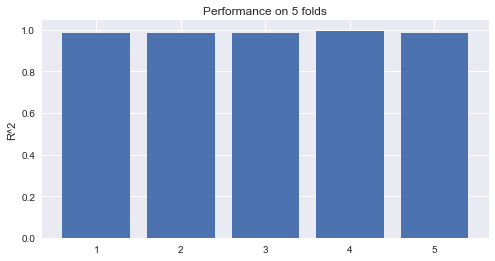

In [10]:
# Perform 5-fold cross validation on trainning set
performance = cross_val_score(LogReg, X_train, y_train,cv = 5)
print(performance)

fig = plt.figure(figsize=(8,4))
index = [1,2,3,4,5]
plt.bar(index, performance)
plt.ylabel('R^2')
plt.title('Performance on 5 folds')

We can see from the graph above that the $R^2$ value is adound 98% for each fold, so logistic regression is consistent in this case.

# KNN Classification

In [11]:
# Find the optimal number of neighbors
for n in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    # Calculate the accuracy of prediction
    accuracy = accuracy_score(y_pred, y_test)
    print('The accuracy of prediction on testing data: %.2f' % accuracy)

The accuracy of prediction on testing data: 1.00
The accuracy of prediction on testing data: 1.00
The accuracy of prediction on testing data: 1.00
The accuracy of prediction on testing data: 1.00
The accuracy of prediction on testing data: 1.00
The accuracy of prediction on testing data: 1.00
The accuracy of prediction on testing data: 1.00
The accuracy of prediction on testing data: 1.00
The accuracy of prediction on testing data: 1.00


Since all cases have an acurracy of 100%, then we proceed to cross validation to see if they are consistent or not.

In [12]:
for n in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    # Perform 5-fold cross validation on trainning set
    performance = cross_val_score(KNN, X_train, y_train,cv = 5)
    print(performance)

[ 1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.]
[ 1.          0.99557522  1.          1.          1.        ]
[ 1.          0.99557522  1.          1.          1.        ]


From the results above, we can see that KNN classification is consistent and all 5 folds achieve almost 100% accuracy. In addition, the best results are obtained when we set the number of neighbors to be 1, 2 and 3, since all of the folds have an accuracy of 100%.

# Support Vector Machine

In [13]:
# Find the optimal value of C
for c in [1, 10, 100, 1000]:
    SVM = SVC(C=c)
    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    
    # Calculate the accuracy of prediction
    accuracy = accuracy_score(y_pred, y_test)
    print('The accuracy of prediction on testing data: %.2f' % accuracy)
    
    # Perform 5-fold cross validation on trainning set
    performance = cross_val_score(SVM, X_train, y_train, cv = 5)
    print(performance)


The accuracy of prediction on testing data: 1.00
[ 1.  1.  1.  1.  1.]
The accuracy of prediction on testing data: 1.00
[ 1.  1.  1.  1.  1.]
The accuracy of prediction on testing data: 1.00
[ 1.  1.  1.  1.  1.]
The accuracy of prediction on testing data: 1.00
[ 1.  1.  1.  1.  1.]


We can see that SVM performs really well, achieving 100% accuracy in each fold, regardless of what the value of C is.

# Decision Trees Classification

The optimal decision tree depth is 6


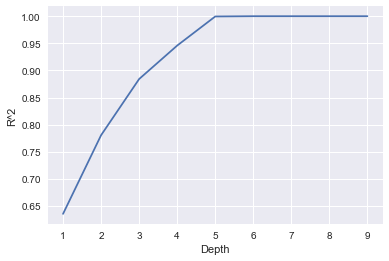

In [14]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")


# Find the optimal depth of the tree
scores=[]
depths = range(1,10)
for n in depths:
    DT = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    DT.fit(X_train, y_train)
    scores.append(DT.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print("The optimal decision tree depth is", n_opt)

[ 1.  1.  1.  1.  1.]


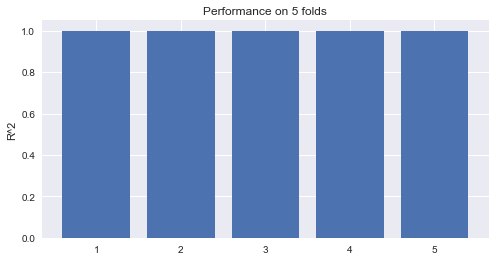

In [15]:
# Perform 5-fold cross validation on trainning set using optimal max_depth=6
DT = DecisionTreeRegressor(max_depth=6)
performance = cross_val_score(DT, X_train, y_train, cv = 5)
print(performance)
fig = plt.figure(figsize=(8,4))
index = [1,2,3,4,5]
plt.bar(index, performance)
plt.ylabel('R^2')
plt.title('Performance on 5 folds')

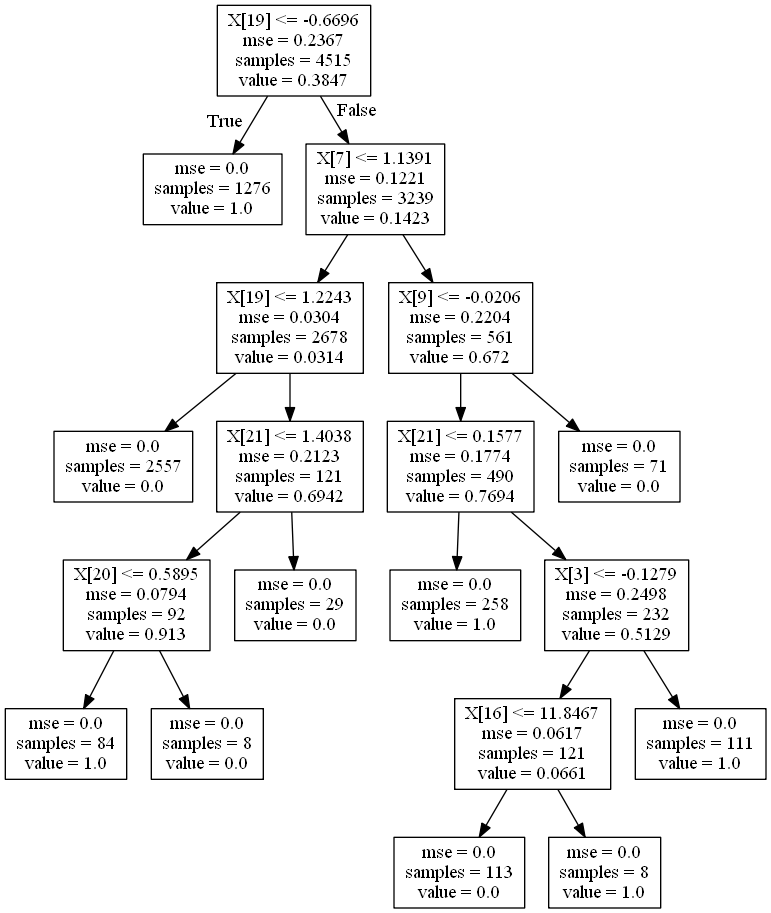

In [16]:
# Plot the tree using the optimal max_depth=6
DT = DecisionTreeRegressor(max_depth=6)
DT.fit(X_train, y_train)
visualize_tree(DT, feature_names=['x'])
dot_data=export_graphviz(DT, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Random Forest Classifier

In [17]:
# We use default values for all parameters
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_pred, y_test))

1.0


[ 1.  1.  1.  1.  1.]


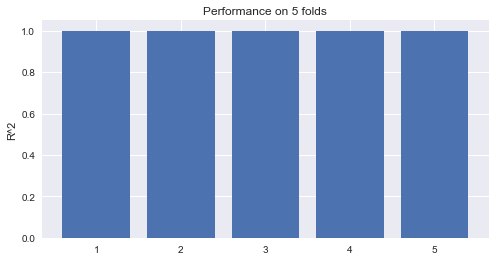

In [18]:
# Perform 5-fold cross validation on trainning set using default values
RF = RandomForestClassifier()
performance = cross_val_score(RF, X_train, y_train, cv = 5)
print(performance)
fig = plt.figure(figsize=(8,4))
index = [1,2,3,4,5]
plt.bar(index, performance)
plt.ylabel('R^2')
plt.title('Performance on 5 folds')

We cann see that with default random forest classifier, we have  alreafy achieve 100% accuracy in all 5 folds.

# Principle Component Analysis

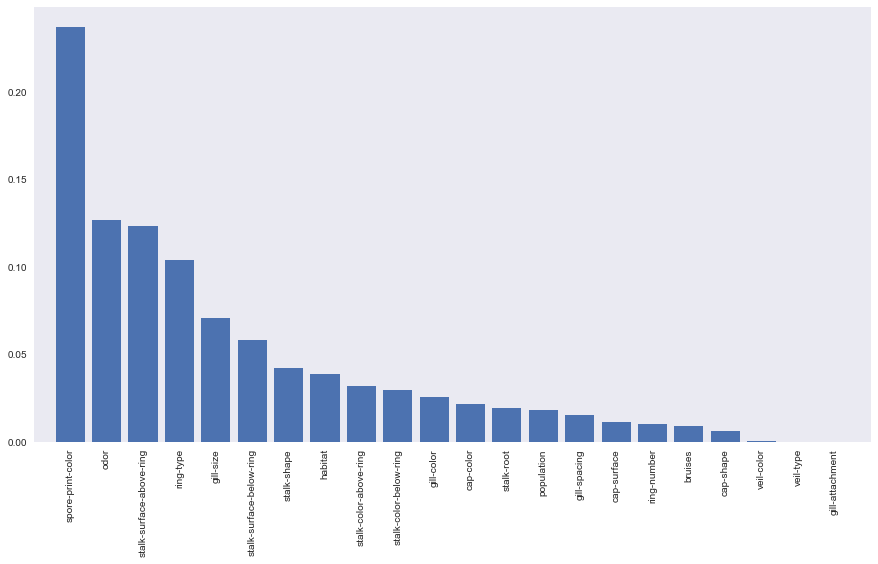

In [19]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
importances = RF.feature_importances_
features = data.columns[1:]
sort_indices = np.argsort(importances)[::-1]
sorted_features = []
for idx in sort_indices:
    sorted_features.append(features[idx])
fig = plt.figure(figsize=(15,8))
plt.bar(range(len(importances)), importances[sort_indices], align='center');
plt.xticks(range(len(importances)), sorted_features, rotation='vertical');
plt.xlim([-1, len(importances)])
plt.grid(False)


From the graph above, we found that the most indicative feature of a poisonous mushroom is the spore print color of mushroom. The second most important feature is the odor of mushroom.